# Token Analysis

- Data: `test.in`

In [260]:
import matplotlib.pyplot as plt # plotting
import re # string processing 
from os import path # operating system build-in 
from tqdm import tqdm #progress bar
import pickle # save items
import numpy as np # numerical computation

In [241]:
# Token function 
def tokenize(text:str):
    """
    Separate string as tokens
    Note: 通常 \w 代表的是 [A-Za-z0-9_]，但在 Python3 中，\w 也可以是中文字。
    """
    # exlucding _
    text = text.replace("_"," ")
    splits = re.split('\W', text)
    tokens = []
    # Filter out null string
    for s in splits:
        if s!= '':
            tokens.append(s)
    return tokens

# Parse contents
def get_messages(fn:str):
    meg = []
    with open(fn, 'r') as f:
        i = 1
        for line in f:
            if ((i-5)%6 == 0):
                meg.append(line)
            i+=1
    return meg

def unique(list1):
     
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    return unique_list

# Plotting 


## Example: Token extraction



In [242]:
print(tokenize("232 4 2 43 + - 3)()I have a good data2.:?^-_____________"))

['232', '4', '2', '43', '3', 'I', 'have', 'a', 'good', 'data2']


## Working with Data

In [243]:
# Load Data
dataPath = "../data/test.in"
assert(path.exists(dataPath))

In [244]:
# Get messages
messages = get_messages(dataPath)

### Number of messages

In [245]:
len(messages)

16667

### Sample message

In [246]:
i_s = 0
messages[i_s]

"Minas-Rio is an iron ore mining project in Brazil.[1] It is one of the world's largest mining projects, and is initially expected to export 26.5 million tonnes of iron ore in 2013, through a 525km slurry pipeline to a port at Au;[2] production potential is 53 Mtpa or higher.[3] The project was bought by Anglo American PLC, which is facing high costs.[4][5] The mine has certified reserves of 4.6 billion tonnes of itabirite.[6] There have been delays in starting the project, but in December 2010, Anglo American obtained a key license needed from Brazilian government before mining could start.[7][8]  I read the paragraph on http://wikipedia.org \n"

### Tokenized sample message

In [247]:
print(tokenize(messages[i_s]))

['Minas', 'Rio', 'is', 'an', 'iron', 'ore', 'mining', 'project', 'in', 'Brazil', '1', 'It', 'is', 'one', 'of', 'the', 'world', 's', 'largest', 'mining', 'projects', 'and', 'is', 'initially', 'expected', 'to', 'export', '26', '5', 'million', 'tonnes', 'of', 'iron', 'ore', 'in', '2013', 'through', 'a', '525km', 'slurry', 'pipeline', 'to', 'a', 'port', 'at', 'Au', '2', 'production', 'potential', 'is', '53', 'Mtpa', 'or', 'higher', '3', 'The', 'project', 'was', 'bought', 'by', 'Anglo', 'American', 'PLC', 'which', 'is', 'facing', 'high', 'costs', '4', '5', 'The', 'mine', 'has', 'certified', 'reserves', 'of', '4', '6', 'billion', 'tonnes', 'of', 'itabirite', '6', 'There', 'have', 'been', 'delays', 'in', 'starting', 'the', 'project', 'but', 'in', 'December', '2010', 'Anglo', 'American', 'obtained', 'a', 'key', 'license', 'needed', 'from', 'Brazilian', 'government', 'before', 'mining', 'could', 'start', '7', '8', 'I', 'read', 'the', 'paragraph', 'on', 'http', 'wikipedia', 'org']


## Get all tokens

In [248]:
# Get all tokens
tokens = []
for m in messages:
    ts = tokenize(m)
    for t in ts:
        tokens.append(t)

### Total number of tokens (duplicates included)

In [249]:
len(tokens)

3559582

### Total number of unique tokens

In [250]:
unitk = unique(tokens)
len(unitk)

169367

In [251]:
print(unitk[0:20])

['expunged', 'Canthium', 'surpressed', 'Goubrine', 'Lothringen', 'Wasserfall', 'reunite', 'capsularis', 'dumplings', 'inducts', 'Putnik', 'Saltimbancos', '77278', 'scrimm', 'InSb', 'particle', 'Catch', 'Fokker', 'Mingora', 'Afyon']


### Maxmum length of unique tokens

In [252]:
lmax = -1
strmax = ""
for s in unitk:
    l = len(s)
    if lmax < l:
        lmax = l
        strmax = s
print("Maximum length of token: ", lmax)
print("Longest token: ", strmax)

Maximum length of token:  51
Longest token:  NeckargemndNeckarsteinachEberbachNeckarelzJagstfeld


## Distribution of length of all tokens

In [253]:
lens = []
for t in tokens:
    lens.append(len(t))

In [298]:
number_list = np.array(lens)

(unique, counts) = np.unique(number_list, return_counts=True)

# Cumulative counts
counts_cum = [counts[0]]
for (i,c) in enumerate(counts[1:]):
    counts_cum.append(counts_cum[-1] + c)
    

    

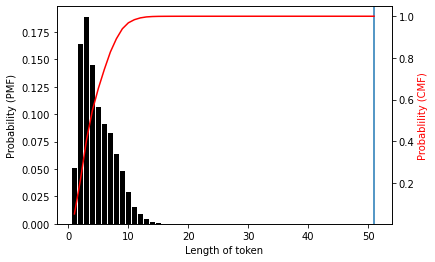

In [314]:
fig, ax = plt.subplots()

ax.bar(unique, counts/sum(counts), color="black", label="PMF")
ax.set_xlabel("Length of token")
ax.set_ylabel("Probability (PMF)", color="black")
ax.axvline(max(lens))

ax2 = ax.twinx()
ax2.plot(unique, counts_cum/sum(counts), color="red", label="CMF")
ax2.set_ylabel("Probablility (CMF)", color="red")


fig.savefig("img/token_length_pmf.pdf", transparent=True)

In [308]:
print("Len\tCMF")
for i,j in enumerate(counts_cum/sum(counts)):
    print(i, j)

Len	CMF
0 0.050994470699087704
1 0.21468251047454448
2 0.40355693449399394
3 0.5480710937407819
4 0.6543532358574686
5 0.7456072089363301
6 0.8284837938836639
7 0.8917999360599081
8 0.9399171026260948
9 0.9684690505795344
10 0.98341013074007
11 0.9921164900822624
12 0.996690622662998
13 0.9986192198971677
14 0.9994291464559603
15 0.9996884465647933
16 0.9998176752214164
17 0.9999027975756704
18 0.9999376331265862
19 0.9999564555613553
20 0.9999662881765331
21 0.9999713449500531
22 0.9999780873147465
23 0.9999828631564043
24 0.9999865152706132
25 0.9999896055210977
26 0.9999926957715821
27 0.9999938194990311
28 0.9999960669539288
29 0.9999974716132399
30 0.9999983144088267
31 0.9999988762725511
32 0.9999994381362756
33 0.9999997190681378
34 1.0
